Import libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import investpy as ip
# import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import plotly.express as px
import os
from scipy import signal
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error as mse


C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecatio

Get historical data from stock name

In [35]:
#Define function to egt historical data with investpy
def get_stock_df(stock, country, from_date, to_date, interval):
    return ip.get_stock_historical_data(stock=stock,
                                  country=country,
                                  from_date=from_date,
                                  to_date=to_date,
                                  interval=interval)
#get historical data from 5 yeasr ago from Netflix 
nflx = get_stock_df("NFLX", 'united states', '01/01/2021', '22/04/2022', 'daily')

nflx.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-01-04,539.59,540.62,515.34,522.86,4444407,USD
2021-01-05,521.49,526.60,515.89,520.80,3133872,USD
2021-01-06,510.17,512.97,499.66,500.49,5346210,USD
2021-01-07,508.84,516.24,506.52,508.89,3686448,USD
2021-01-08,511.31,513.24,504.51,510.40,2973949,USD


Function to show high graph

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


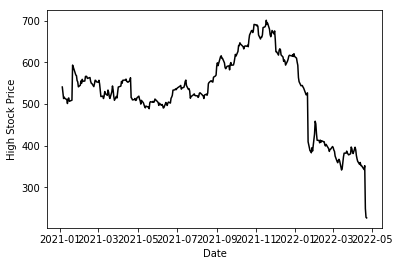

In [36]:
def plt_high(data):
    #get yAxis
    y = np.array(data.High)
    
    #get xAxis from Date column
    time = np.array(data.index)
    time = pd.to_datetime(time)#change type
    
    plt.plot(time, y, color='k')
    plt.ylabel('High Stock Price')
    plt.xlabel('Date')
plt_high(nflx)

In [37]:
y = np.array(nflx.High)
    
#get xAxis from Date column
time = np.array(nflx.index)
time = pd.to_datetime(time)

In [38]:
train_split = int(len(y)*0.9)
val_split = int(len(y)*0.05)
y_train = y[0:train_split]
X_train = np.arange(0,len(y_train),1).reshape(-1,1)
X_tot =  np.arange(0,len(y),1).reshape(-1,1)
X_val = np.arange(train_split,train_split+val_split,1).reshape(-1,1)
X_test = np.arange(train_split+val_split,len(y),1).reshape(-1,1)
y_val = y[train_split:train_split+val_split]
mse_list = []
degrees = np.arange(3,12,1)
for d in degrees:
    poly = PolynomialFeatures(d)
    new_X_train = poly.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(new_X_train,y_train)
    new_X_val = poly.fit_transform(X_val)
    y_pred = lr.predict(new_X_val)
    mse_list.append(mse(y_pred,y_val))
#new_X_test = poly.fit_transform(X_test)
#y_pred_train = lr.predict(new_X_train)

In [39]:
mse_data = pd.DataFrame({'MSE':mse_list,'Degrees':degrees})
mse_data.sort_values(by='MSE')

,MSE,Degrees
8,601.650696,11
3,794.646545,6
7,7921.418368,10
0,9639.281773,3
2,15273.967210,5
4,18030.238581,7
5,35576.838409,8
6,39092.489398,9
1,52447.037318,4


C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


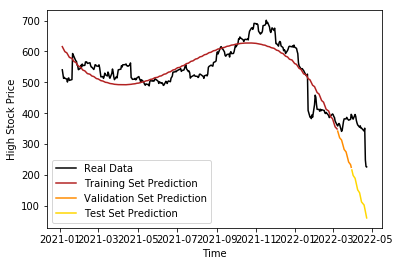

In [40]:
train_split = int(len(y)*0.9)
val_split = int(len(y)*0.05)
y_train = y[0:train_split]
X_train = np.arange(0,len(y_train),1).reshape(-1,1)
X_tot =  np.arange(0,len(y),1).reshape(-1,1)
opt_degree = 3

poly = PolynomialFeatures(opt_degree)
new_X_tot = poly.fit_transform(X_tot)
new_X_train = poly.fit_transform(X_train)
new_X_val = poly.fit_transform(X_val)
new_X_test = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(new_X_train,y_train)
y_pred_train = lr.predict(new_X_train)
y_pred_val = lr.predict(new_X_val)
y_pred_test = lr.predict(new_X_test)

plt.plot(time,y,color='k',label='Real Data')
plt.xlabel('Time')
plt.ylabel('High Stock Price')
plt.plot(time[0:train_split],y_pred_train,color='firebrick',label='Training Set Prediction')
plt.plot(time[train_split:train_split+val_split],y_pred_val,color='darkorange',label='Validation Set Prediction')
plt.plot(time[train_split+val_split::],y_pred_test,color='gold',label='Test Set Prediction')
plt.legend()

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


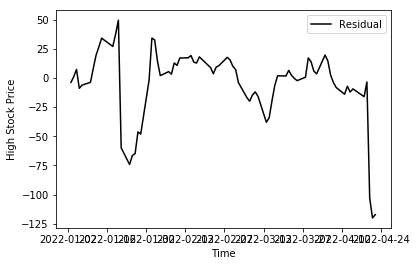

In [27]:

y_pred = lr.predict(new_X_tot)
y_detrend = y-y_pred
plt.plot(time,y_detrend,label='Residual',color='k')
plt.xlabel('Time')
plt.ylabel('High Stock Price')
plt.legend()

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


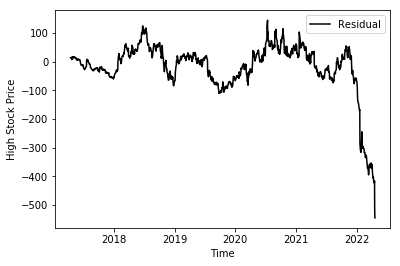

In [10]:
y_pred = lr.predict(new_X_tot)
y_detrend = y-y_pred
plt.plot(time,y_detrend,label='Residual',color='k')
plt.xlabel('Time')
plt.ylabel('High Stock Price')
plt.legend()

In [28]:
detrend_data = pd.DataFrame([time,y_detrend]).T
detrend_data = detrend_data.rename(columns={0:'Date',1:'y'})
(detrend_data)

,Date,y
0,2022-01-03,-3.85876
1,2022-01-04,1.0103
2,2022-01-05,7.291
3,2022-01-06,-8.92415
4,2022-01-07,-6.16268
...,...,...
72,2022-04-18,-16.0653
73,2022-04-19,-3.47163
74,2022-04-20,-102.878
75,2022-04-21,-120.011
